# Optical flow

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def display_frame(frame):
    plt.imshow(frame[:,:,::-1])  # Convert BGR to RGB
    plt.axis("off")  # Hide the axis
    plt.show()

def show_optical_flow(frame_old, frame, flow_bgr):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(frame_old[:,:,::-1])
    axes[0].set_title("Frame 1")
    axes[0].axis("off")

    axes[1].imshow(frame[:,:,::-1])
    axes[1].set_title("Frame 2")
    axes[1].axis("off")

    axes[2].imshow(flow_bgr[:,:,::-1])
    axes[2].set_title("Optical Flow")
    axes[2].axis("off")

    # Show the plot
    plt.show()


In [15]:

def calculate_optical_flow(
    prev_frame, curr_frame, pyr_scale, levels, winsize, iterations, poly_n, poly_sigma, flags
):
    # Initialize an HSV image for visualization
    hsv_image = np.zeros_like(prev_frame)
    hsv_image[..., 1] = 255

    # Convert frames to grayscale
    prev_frame_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    curr_frame_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow using Farneback method
    optical_flow = cv2.calcOpticalFlowFarneback(
        prev_frame_gray,
        curr_frame_gray,
        None,
        pyr_scale,
        levels,
        winsize,
        iterations,
        poly_n,
        poly_sigma,
        flags
    )

    # Convert flow to magnitude and angle
    magnitude, angle = cv2.cartToPolar(optical_flow[..., 0], optical_flow[..., 1])

    # Set HSV values based on flow direction and magnitude
    hsv_image[..., 0] = angle * 180 / np.pi / 2
    hsv_image[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to BGR for visualization
    bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    return bgr_image

In [6]:
kick_path = "./kick.mp4"
back_path = "./back.mp4"

In [7]:
kick_vid = cv2.VideoCapture(kick_path)
back_vid = cv2.VideoCapture(back_path)

### KICK

In [9]:
r, begin_frame = kick_vid.read()
r, begin_frame.shape


(True, (480, 854, 3))

In [24]:
fps = kick_vid.get(cv2.CAP_PROP_FPS)

seconds_to_skip = 1.3
kick_vid.set(cv2.CAP_PROP_POS_MSEC, seconds_to_skip * 1000)

_, later_kick_frame = kick_vid.read()

In [25]:
flow = calculate_optical_flow(later_kick_frame, begin_frame, 0.5, 3, 15, 3, 5, 1.2, 0)

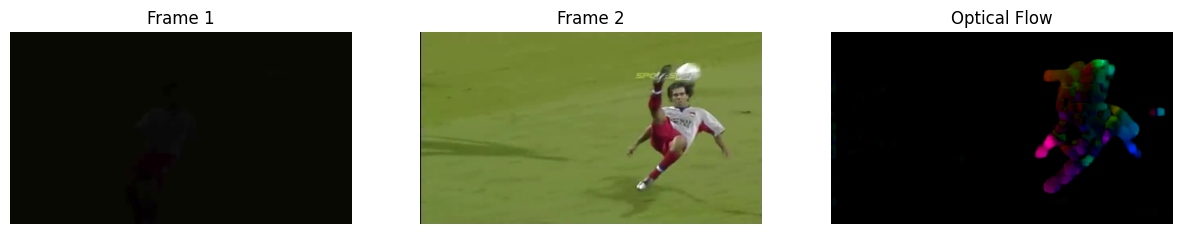

In [26]:
show_optical_flow(begin_frame, later_kick_frame, flow)

### BACK

In [28]:
seconds_to_skip = 1.2
_, back_frame_old = back_vid.read()
back_vid.set(cv2.CAP_PROP_POS_MSEC, seconds_to_skip * 1000)
_, back_frame = back_vid.read()


[h264 @ 0x35713540] mmco: unref short failure
[h264 @ 0x35713540] mmco: unref short failure


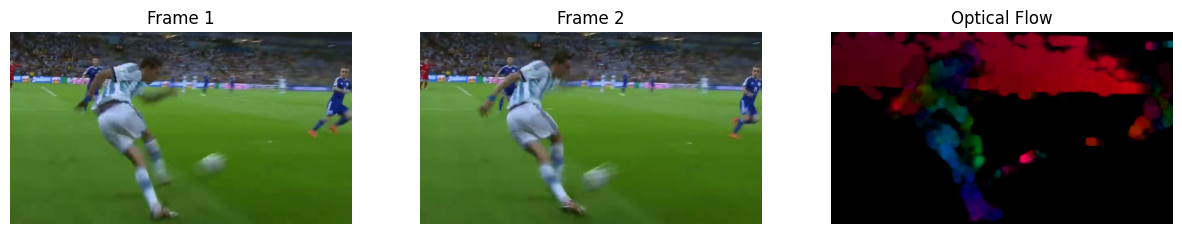

In [31]:
flow = calculate_optical_flow(back_frame_old, back_frame, 0.5, 3, 15, 3, 5, 1.2, 0)

show_optical_flow(back_frame_old, back_frame, flow)

Możliwy wpływ kamery?

## Winsize impact

### Back

WinSize: 1


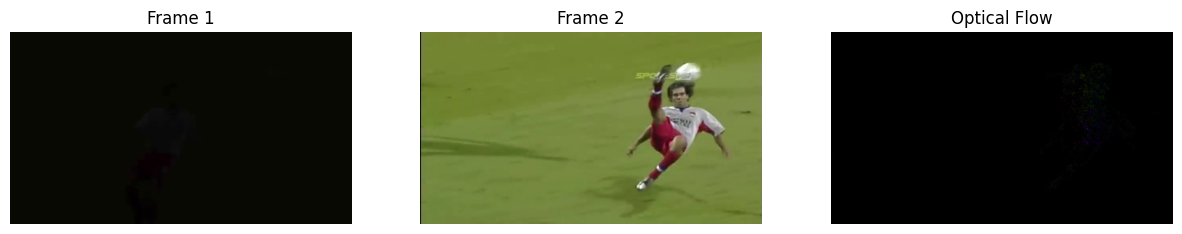

WinSize: 3


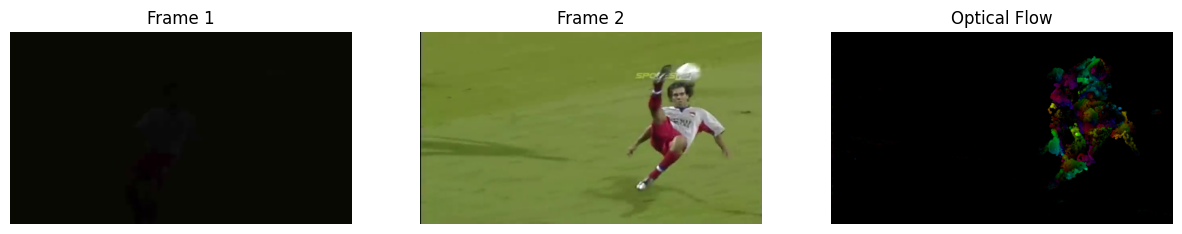

WinSize: 5


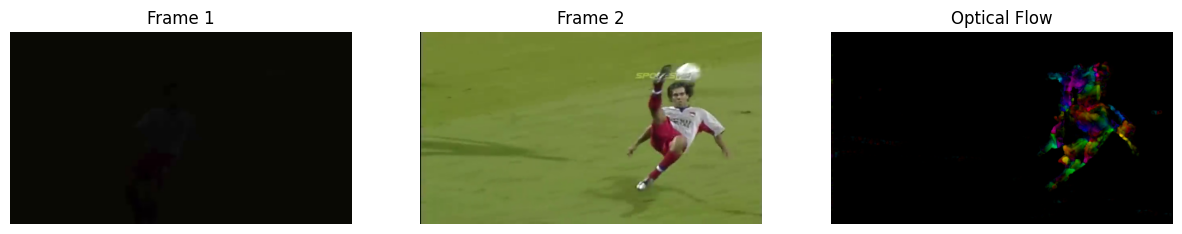

WinSize: 7


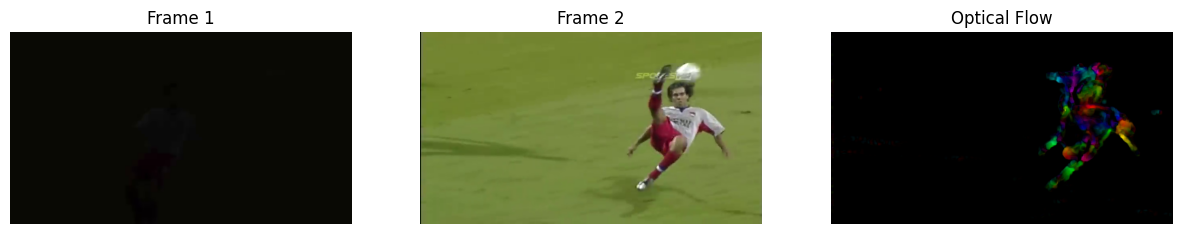

WinSize: 9


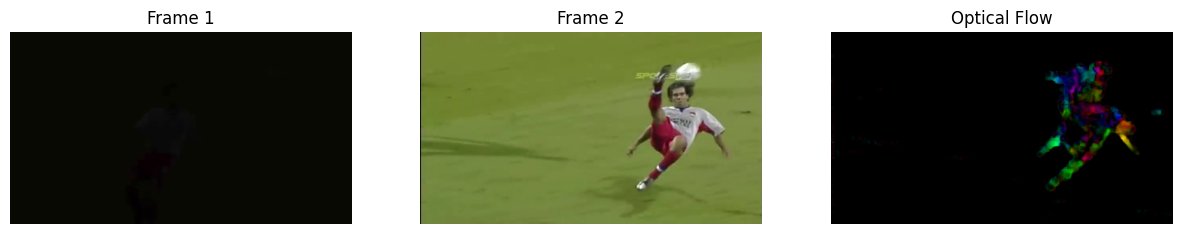

WinSize: 11


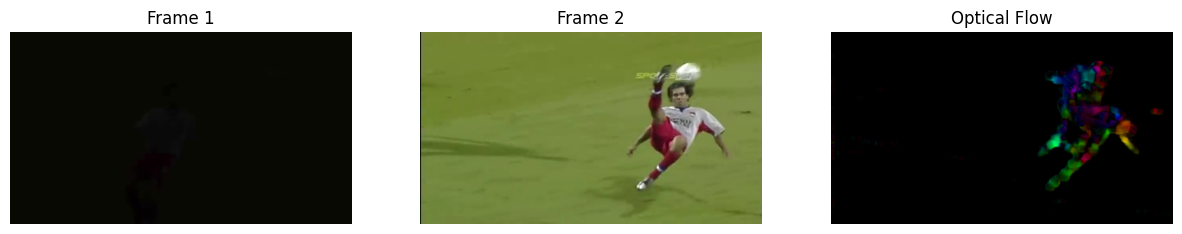

WinSize: 13


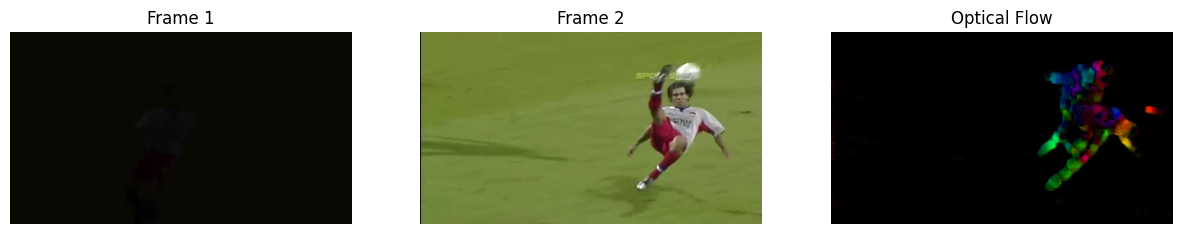

WinSize: 15


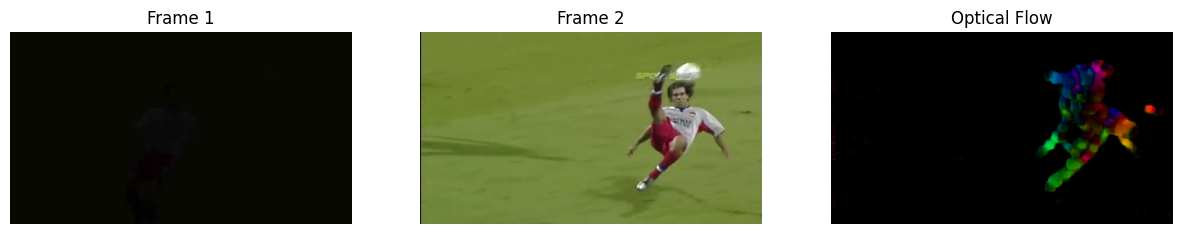

WinSize: 17


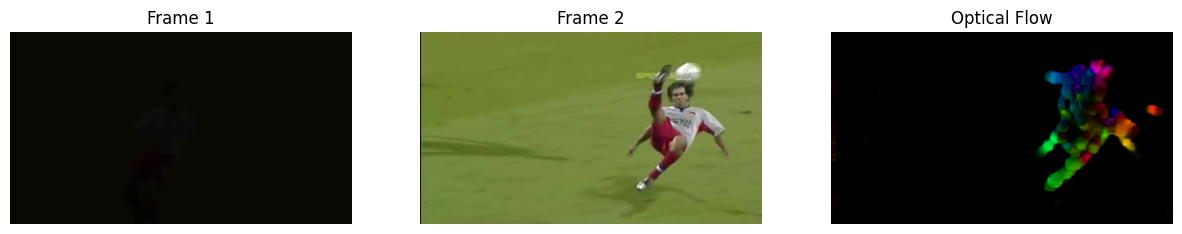

WinSize: 19


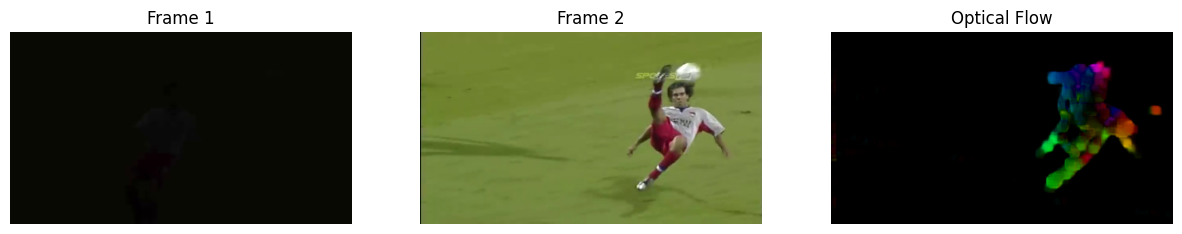

WinSize: 21


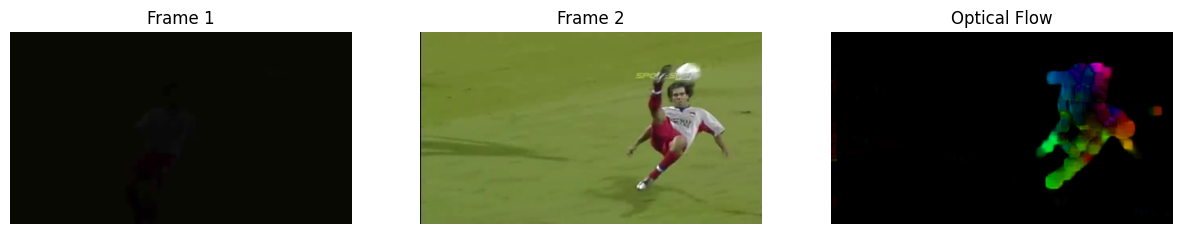

WinSize: 23


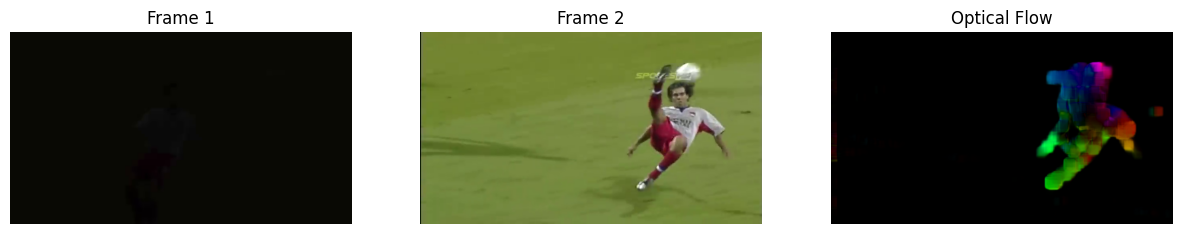

In [36]:
for i in range(1, 25, 2):
    kick_optical_flow = calculate_optical_flow(
        begin_frame, later_kick_frame, 0.5, 3, i, 3, 5, 1.2, 0
    )
    print(f"WinSize: {i}")
    show_optical_flow(begin_frame, later_kick_frame, kick_optical_flow)


### KICK

WinSize: 1


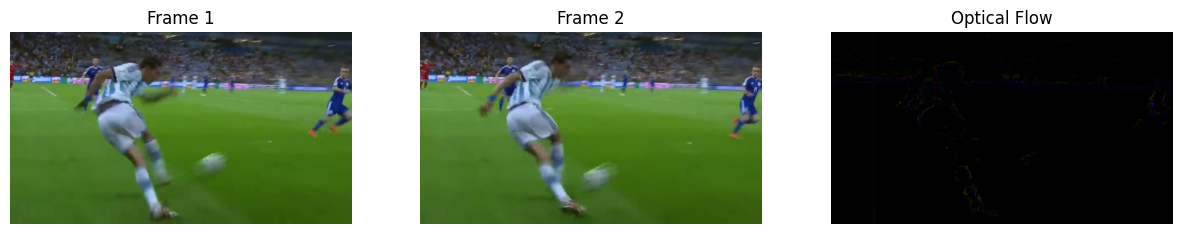

WinSize: 3


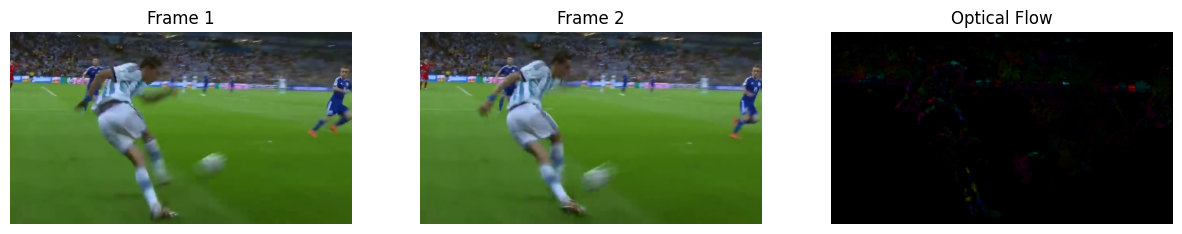

WinSize: 5


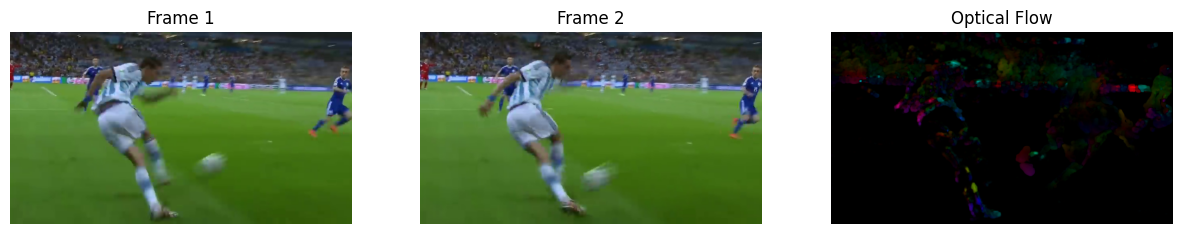

WinSize: 7


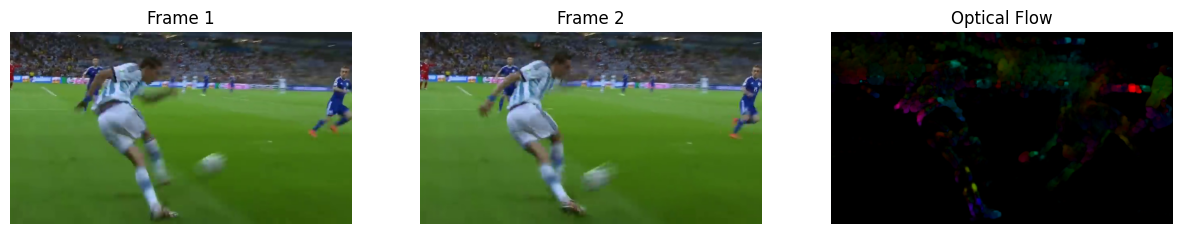

WinSize: 9


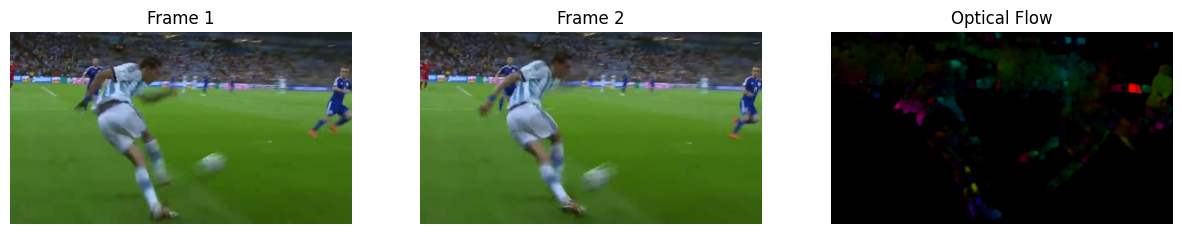

WinSize: 11


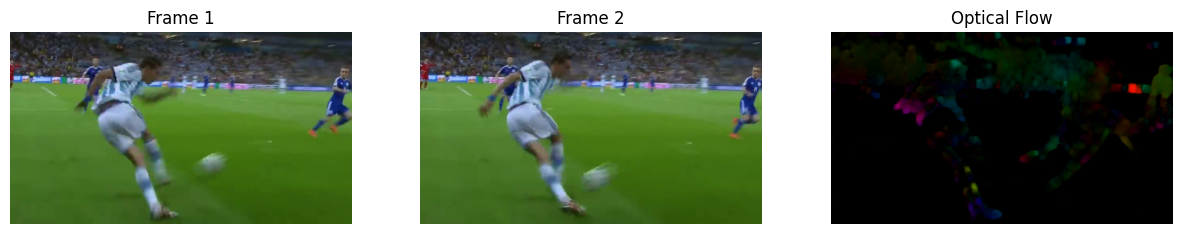

WinSize: 13


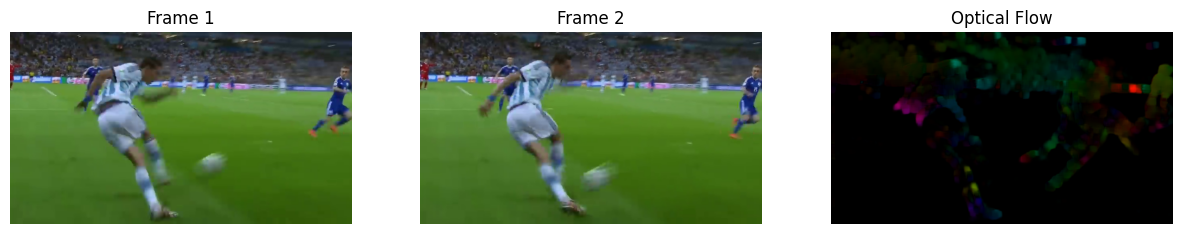

WinSize: 15


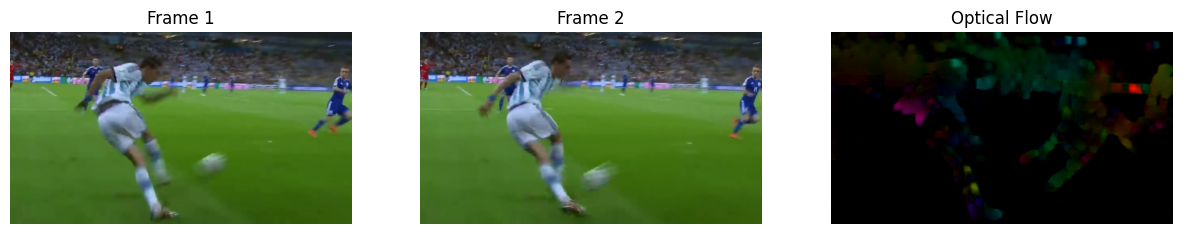

WinSize: 17


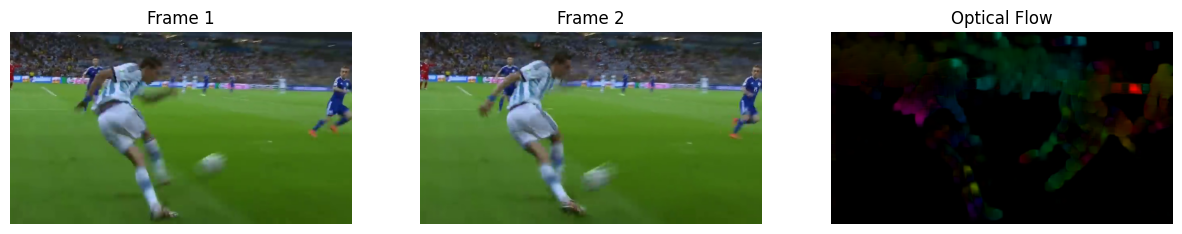

WinSize: 19


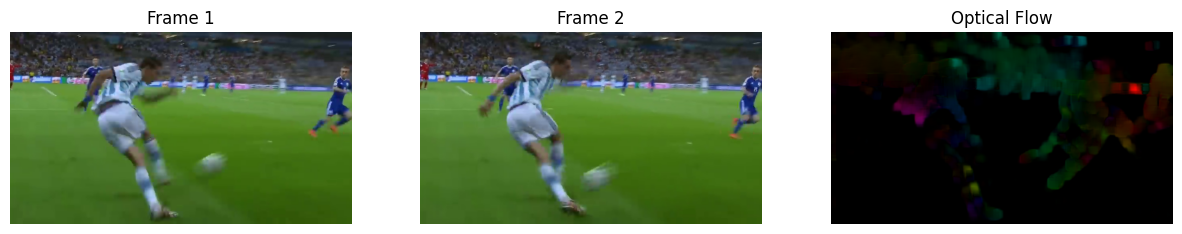

WinSize: 21


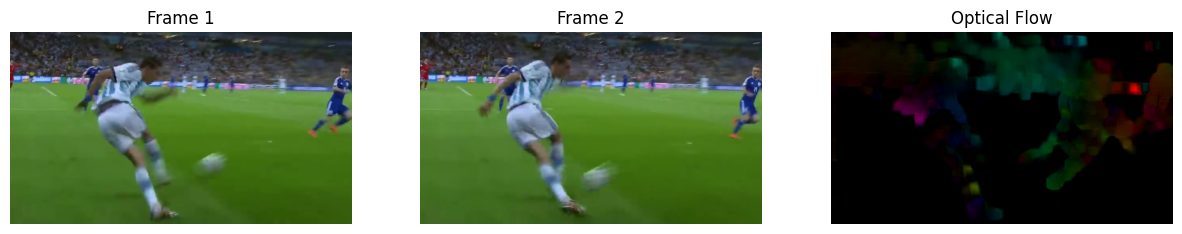

WinSize: 23


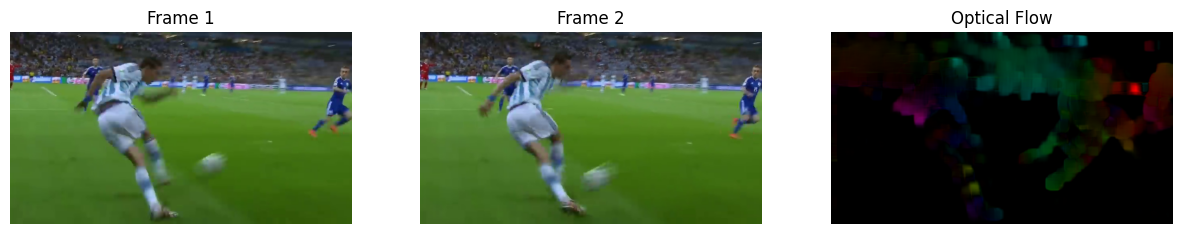

In [35]:
for i in range(1, 25, 2):
    kick_optical_flow = calculate_optical_flow(
        back_frame_old, later_kick_frame, 0.5, 3, i, 3, 5, 1.2, 0
    )
    print(f"WinSize: {i}")
    show_optical_flow(back_frame_old, back_frame, kick_optical_flow)


Większe wartości window_size sprawiają, że algorytm staje się bardziej odporny na szumy w obrazie, co daje lepsze wyniki w przypadku wykrywania szybkich ruchów. Jednakże, wyższe wartości mogą prowadzić do większego rozmycia pola ruchu (blur), co oznacza, że precyzyjność wykrywania szczegółów ruchu może spaść.

Mniejsze wartości window_size prowadzą do mniejszej ilości rozmycia, ale algorytm może stać się bardziej wrażliwy na szumy w obrazie, co może pogorszyć dokładność w przypadku obrazów z dużą ilością zakłóceń.